In [1]:
import pandas as pd
car_data = pd.read_excel("concat_cities_car_data.xlsx")
car_data.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Compression Ratio,Value Configuration,Color,Turbo Charger,top_features_count,Max Torque,commonIcon,Acceleration_1,Turning Radius_1,Super Charger
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
car_data.duplicated().sum()

np.int64(84)

In [3]:
duplicates = car_data.duplicated()
car_data[duplicates]

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Compression Ratio,Value Configuration,Color,Turbo Charger,top_features_count,Max Torque,commonIcon,Acceleration_1,Turning Radius_1,Super Charger
79,0,Petrol,Hatchback,"60,000",Manual,2,2nd Owner,Maruti,Maruti Ritz,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Hyundai,Hyundai Venue,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,0,Petrol,Hatchback,"80,000",Manual,3,3rd Owner,Hyundai,Hyundai i10,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,0,Petrol,Sedan,"50,000",Manual,1,1st Owner,Fiat,Fiat Linea,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926,0,Diesel,Hatchback,"90,000",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2014,...,NaN,DOHC,Others,No,9.0,160Nm@1500-2750rpm,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,NaN,NaN,No
8025,0,Petrol,Hatchback,"80,000",Manual,4,4th Owner,Maruti,Maruti Swift,2010,...,9:01,DOHC,Others,Yes,9.0,"113Nm @ 4,500rpm",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,NaN,NaN,No
8133,0,Diesel,Sedan,"30,000",Manual,1,1st Owner,Volkswagen,Volkswagen Vento,2014,...,NaN,DOHC,Others,Yes,9.0,250Nm@1500-2500rpm,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,NaN,NaN,No
8154,0,Petrol,Minivans,"50,000",Manual,3,3rd Owner,Maruti,Maruti Eeco,2010,...,9.9:1,DOHC,Red,No,8.0,101Nm@3000rpm,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,NaN,NaN,No


In [4]:
car_data = car_data.drop_duplicates()

In [5]:
car_data.duplicated().sum()

np.int64(0)

In [6]:
missing_counts = car_data.isnull().sum()
missing_counts = missing_counts[missing_counts >= 0]
missing_counts_sorted = missing_counts.sort_values(ascending=False)
missing_counts_sorted

priceSaving         8285
priceFixedText      8285
Alloy Wheel Size    8257
Steering Type       8257
No Door Numbers     8257
                    ... 
modelYear              0
price                  0
variantName            0
centralVariantId       0
City                   0
Length: 113, dtype: int64

In [7]:
missing_percentage = (car_data.isnull().sum() / len(car_data)) * 100
threshold = 50
columns_to_remove = missing_percentage[missing_percentage > threshold].index
car_data_clean = car_data.drop(columns=columns_to_remove)

In [8]:
print(columns_to_remove)

Index([               'priceActual',                'priceSaving',
                   'priceFixedText',                'top_feature',
                                  0,                            1,
                                  2,                            3,
                                  4,              'comfort_count',
                         'interior',                   'Exterior',
                     'safety_count',        'Entertainment_count',
                     'Gross Weight',   'Ground Clearance Unladen',
                 'Seating Capacity',              'Steering Type',
                        'Tyre Type',           'Alloy Wheel Size',
                  'No Door Numbers',                   'Length_1',
                          'Width_1',                   'Height_1',
                     'Wheel Base_1',              'Front Tread_1',
                     'Rear Tread_1',              'Kerb Weight_1',
                   'Gross Weight_1', 'Ground Clearance Unladen

In [9]:
missing_counts = car_data_clean.isnull().sum()
missing_counts = missing_counts[missing_counts >= 0]
missing_counts_sorted = missing_counts.sort_values(ascending=False)
missing_counts_sorted
for i in range(0, len(missing_counts_sorted), 20):
    print(missing_counts_sorted[i:i+20])

Drive Type             3671
Turning Radius         3652
Rear Tread             3537
Front Tread            3525
Value Configuration    3274
Steering Type_1        3110
Super Charger          3069
Tyre Type_1            2993
Wheel Size             2961
No Door Numbers_1      2948
Seating Capacity_1     2944
Fuel Suppy System      2881
Gear Box               2647
Rear Brake Type        2636
Front Brake Type       2636
Turbo Charger          2303
Engine Type            1699
Cargo Volumn           1572
Max Torque             1510
Max Power_1            1510
dtype: int64
Values per Cylinder    1506
No of Cylinder         1491
Color                  1467
Displacement           1467
data                   1466
top_features_count     1466
commonIcon             1466
heading                1466
top                    1466
RTO                     873
Mileage                 285
Wheel Base              160
Width                    83
Height                   79
Length                   79
Max Pow

In [10]:
list(car_data_clean.columns)

['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'trendingText.imgUrl',
 'trendingText.heading',
 'trendingText.desc',
 'Registration Year',
 'Insurance Validity',
 'Fuel Type',
 'Seats',
 'Kms Driven',
 'RTO',
 'Ownership',
 'Engine Displacement',
 'Transmission',
 'Year of Manufacture',
 'Mileage',
 'Engine',
 'Max Power',
 'Torque',
 'Seats_1',
 'Wheel Size',
 'Length',
 'Width',
 'Height',
 'Wheel Base',
 'Front Tread',
 'Rear Tread',
 'Kerb Weight',
 'Seating Capacity_1',
 'Steering Type_1',
 'Tyre Type_1',
 'No Door Numbers_1',
 'Gear Box',
 'Drive Type',
 'Turning Radius',
 'Front Brake Type',
 'Rear Brake Type',
 'Cargo Volumn',
 'City',
 'data',
 'Engine Type',
 'Displacement',
 'top',
 'Max Power_1',
 'Fuel Suppy System',
 'heading',
 'No of Cylinder',
 'Values per Cylinder',
 'Value Configuration',
 'Color',
 'Turbo Charger',
 'top_features_count',
 'Max Torque',
 'commonIcon',


In [11]:
print(car_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8285 entries, 0 to 8368
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   it                    8285 non-null   int64  
 1   ft                    8285 non-null   object 
 2   bt                    8281 non-null   object 
 3   km                    8285 non-null   object 
 4   transmission          8285 non-null   object 
 5   ownerNo               8285 non-null   int64  
 6   owner                 8285 non-null   object 
 7   oem                   8285 non-null   object 
 8   model                 8285 non-null   object 
 9   modelYear             8285 non-null   int64  
 10  centralVariantId      8285 non-null   int64  
 11  variantName           8285 non-null   object 
 12  price                 8285 non-null   object 
 13  trendingText.imgUrl   8285 non-null   object 
 14  trendingText.heading  8285 non-null   object 
 15  trendingText.desc     8285

In [12]:
columns_to_delete = ['Kms Driven','transmission','owner','Ownership','trendingText.imgUrl','trendingText.heading','trendingText.desc',
                     'Registration Year','Year of Manufacture','Engine Displacement','Seats']
car_data_clean = car_data_clean.drop(columns=columns_to_delete)

print(car_data_clean)

      it      ft         bt        km  ownerNo            oem  \
0      0  Petrol  Hatchback  1,20,000        3         Maruti   
1      0  Petrol        SUV    32,706        2           Ford   
2      0  Petrol  Hatchback    11,949        1           Tata   
3      0  Petrol      Sedan    17,794        1        Hyundai   
4      0  Diesel        SUV    60,000        1         Maruti   
...   ..     ...        ...       ...      ...            ...   
8364   0  Petrol  Hatchback    10,000        1         Maruti   
8365   0  Petrol  Hatchback  1,20,000        1         Maruti   
8366   0  Petrol      Sedan    50,000        3  Mercedes-Benz   
8367   0  Petrol  Hatchback    40,000        1         Maruti   
8368   0  Diesel        SUV  1,20,000        2        Renault   

                      model  modelYear  centralVariantId  \
0            Maruti Celerio       2015              3979   
1             Ford Ecosport       2018              6087   
2                Tata Tiago       2018 

In [13]:
print(car_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8285 entries, 0 to 8368
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   it                   8285 non-null   int64  
 1   ft                   8285 non-null   object 
 2   bt                   8281 non-null   object 
 3   km                   8285 non-null   object 
 4   ownerNo              8285 non-null   int64  
 5   oem                  8285 non-null   object 
 6   model                8285 non-null   object 
 7   modelYear            8285 non-null   int64  
 8   centralVariantId     8285 non-null   int64  
 9   variantName          8285 non-null   object 
 10  price                8285 non-null   object 
 11  Insurance Validity   8281 non-null   object 
 12  Fuel Type            8285 non-null   object 
 13  RTO                  7412 non-null   object 
 14  Transmission         8285 non-null   object 
 15  Mileage              8000 non-null   object

In [14]:
columns_to_delete = ['centralVariantId','Wheel Size', 'Wheel Base','it',
   'Front Tread', 
   'Rear Tread', 
   'Kerb Weight',
    'Seating Capacity_1',
  'Steering Type_1',
  'Tyre Type_1',
  'No Door Numbers_1',
   'Drive Type',
   'Turning Radius' ,  
   'Front Brake Type',  
 'Rear Brake Type',     
 'Cargo Volumn',
 'Super Charger',

  'Values per Cylinder',
   'Value Configuration',
 'Fuel Suppy System',
 'commonIcon',
 'data',
 'heading','Max Torque','Displacement','top', 'Turbo Charger' 
   
   ]
car_data_clean = car_data_clean.drop(columns=columns_to_delete)

print(car_data_clean)

          ft         bt        km  ownerNo            oem  \
0     Petrol  Hatchback  1,20,000        3         Maruti   
1     Petrol        SUV    32,706        2           Ford   
2     Petrol  Hatchback    11,949        1           Tata   
3     Petrol      Sedan    17,794        1        Hyundai   
4     Diesel        SUV    60,000        1         Maruti   
...      ...        ...       ...      ...            ...   
8364  Petrol  Hatchback    10,000        1         Maruti   
8365  Petrol  Hatchback  1,20,000        1         Maruti   
8366  Petrol      Sedan    50,000        3  Mercedes-Benz   
8367  Petrol  Hatchback    40,000        1         Maruti   
8368  Diesel        SUV  1,20,000        2        Renault   

                      model  modelYear               variantName        price  \
0            Maruti Celerio       2015                       VXI     ₹ 4 Lakh   
1             Ford Ecosport       2018  1.5 Petrol Titanium BSIV  ₹ 8.11 Lakh   
2                Tata Ti

In [15]:
print(len(car_data_clean.columns))

28


In [16]:
car_data_clean.columns

Index(['ft', 'bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName',
       'price', 'Insurance Validity', 'Fuel Type', 'RTO', 'Transmission',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats_1', 'Length',
       'Width', 'Height', 'Gear Box', 'City', 'Engine Type', 'Max Power_1',
       'No of Cylinder', 'Color', 'top_features_count'],
      dtype='object')

In [17]:
columns_to_delete = ['Max Power_1','Engine Type','No of Cylinder','Gear Box','Height','Width','Length','Torque','Max Power','RTO','ft']
car_data_clean = car_data_clean.drop(columns=columns_to_delete)

print(car_data_clean)

             bt        km  ownerNo            oem                  model  \
0     Hatchback  1,20,000        3         Maruti         Maruti Celerio   
1           SUV    32,706        2           Ford          Ford Ecosport   
2     Hatchback    11,949        1           Tata             Tata Tiago   
3         Sedan    17,794        1        Hyundai          Hyundai Xcent   
4           SUV    60,000        1         Maruti     Maruti SX4 S Cross   
...         ...       ...      ...            ...                    ...   
8364  Hatchback    10,000        1         Maruti         Maruti Celerio   
8365  Hatchback  1,20,000        1         Maruti        Maruti Alto 800   
8366      Sedan    50,000        3  Mercedes-Benz  Mercedes-Benz C-Class   
8367  Hatchback    40,000        1         Maruti            Maruti Ritz   
8368        SUV  1,20,000        2        Renault         Renault Duster   

      modelYear               variantName        price     Insurance Validity  \
0     

In [18]:
print(len(car_data_clean.columns))

17


In [19]:
import pandas as pd
car_data_clean['km'] = car_data_clean['km'].str.replace(",", "").astype(int)

In [20]:
def clean_price(value):
    value = value.replace("₹", "").strip()
    if "Lakh" in value:
        return float(value.replace("Lakh", "").strip()) * 100000 
    elif "Crore" in value:
        return float(value.replace("Crore", "").strip()) * 10000000  
    elif "Thousand" in value:
        return float(value.replace("Thousand", "").strip()) * 1000  
    else:
        return float(value.replace(",", ""))  


car_data_clean['price'] = car_data_clean['price'].apply(clean_price)
print(car_data_clean['price'])

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 8285, dtype: float64


In [21]:
import re

def mileage(value):
    if value is None:
        return None 
    
    match = re.match(r"^\d+(\.\d+)?", str(value))
    
    if match:
        return int(float(match.group()))  
    else:
        return None 


car_data_clean['Mileage'] = car_data_clean['Mileage'].apply(mileage)


print(car_data_clean['Mileage'])

0       23.0
1       17.0
2       23.0
3       19.0
4       23.0
        ... 
8364    25.0
8365    22.0
8366    11.0
8367    18.0
8368    19.0
Name: Mileage, Length: 8285, dtype: float64


In [22]:
car_data_clean['Engine'] = car_data_clean['Engine'].str.replace("CC", "").astype(float, errors='ignore')
car_data_clean['Engine']

0        998.0
1       1497.0
2       1199.0
3       1197.0
4       1248.0
         ...  
8364     998.0
8365     796.0
8366    1796.0
8367    1197.0
8368    1461.0
Name: Engine, Length: 8285, dtype: float64

In [23]:
car_data_clean.isnull().sum()

bt                       4
km                       0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Fuel Type                0
Transmission             0
Mileage                285
Engine                   4
Seats_1                  6
City                     0
Color                 1467
top_features_count    1466
dtype: int64

In [24]:
car_data_clean['bt'].fillna(car_data_clean['bt'].mode()[0], inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_15228\1997337888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean['bt'].fillna(car_data_clean['bt'].mode()[0], inplace=True)


In [25]:
car_data_clean['Insurance Validity'].fillna(car_data_clean['Insurance Validity'].mode()[0], inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_15228\833354675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean['Insurance Validity'].fillna(car_data_clean['Insurance Validity'].mode()[0], inplace=True)


In [26]:
df=car_data_clean['Mileage'].dropna(axis=0)

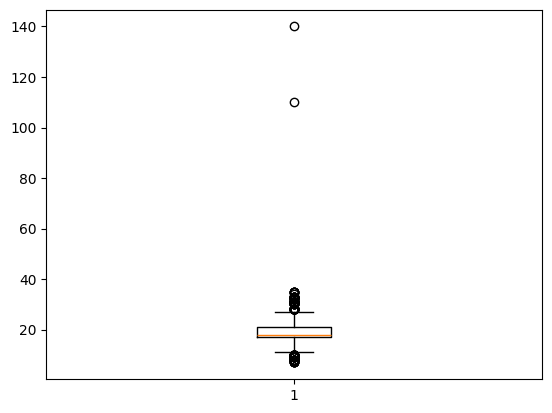

In [27]:
import matplotlib.pyplot as plt
plt.boxplot(df)
plt.show()

In [28]:
car_data_clean['Mileage'].fillna(car_data_clean['Mileage'].median(), inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_15228\2108734979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean['Mileage'].fillna(car_data_clean['Mileage'].median(), inplace=True)


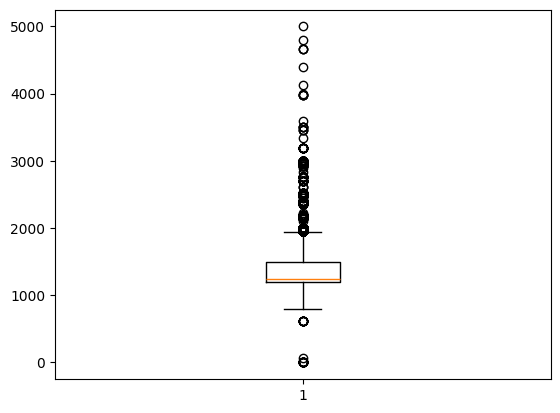

In [29]:
import matplotlib.pyplot as plt
df=car_data_clean['Engine'].dropna(axis=0)
plt.boxplot(df)
plt.show()

In [30]:
car_data_clean['Engine'].fillna(car_data_clean['Engine'].median(), inplace=True)

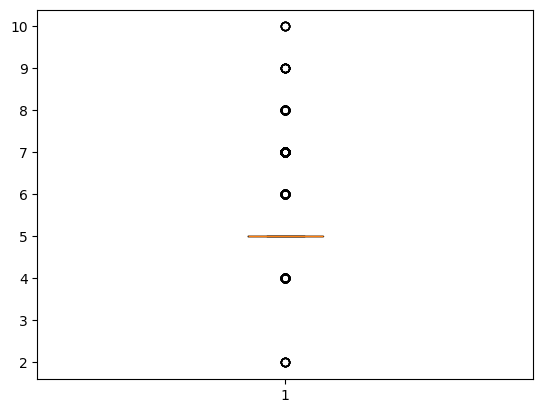

In [31]:
import matplotlib.pyplot as plt
df=car_data_clean['Seats_1'].dropna(axis=0)
plt.boxplot(df)
plt.show()

In [32]:
car_data_clean['Seats_1'].fillna(car_data_clean['Seats_1'].median(), inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_15228\2163072649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean['Seats_1'].fillna(car_data_clean['Seats_1'].median(), inplace=True)


In [33]:
car_data_clean['Color'].fillna(car_data_clean['Color'].mode()[0], inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_15228\1456044748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean['Color'].fillna(car_data_clean['Color'].mode()[0], inplace=True)


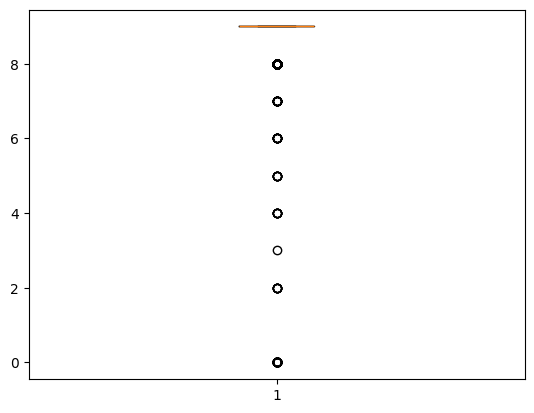

In [34]:
import matplotlib.pyplot as plt
df=car_data_clean['top_features_count'].dropna(axis=0)
plt.boxplot(df)
plt.show()

In [35]:
car_data_clean['top_features_count'].fillna(car_data_clean['top_features_count'].median(), inplace=True)

C:\Users\rs\AppData\Local\Temp\ipykernel_15228\372662071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean['top_features_count'].fillna(car_data_clean['top_features_count'].median(), inplace=True)


In [36]:
car_data_clean.isnull().sum()

bt                    0
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
variantName           0
price                 0
Insurance Validity    0
Fuel Type             0
Transmission          0
Mileage               0
Engine                0
Seats_1               0
City                  0
Color                 0
top_features_count    0
dtype: int64

In [37]:

car_data_clean.drop('variantName', axis=1, inplace=True)
car_data_clean.drop('Engine', axis=1, inplace=True)



In [38]:
car_data_clean.to_csv("finalcarpre.csv",index=False)